C:\Users\yegor\AppData\Local\Temp\ipykernel_10068\195362597.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


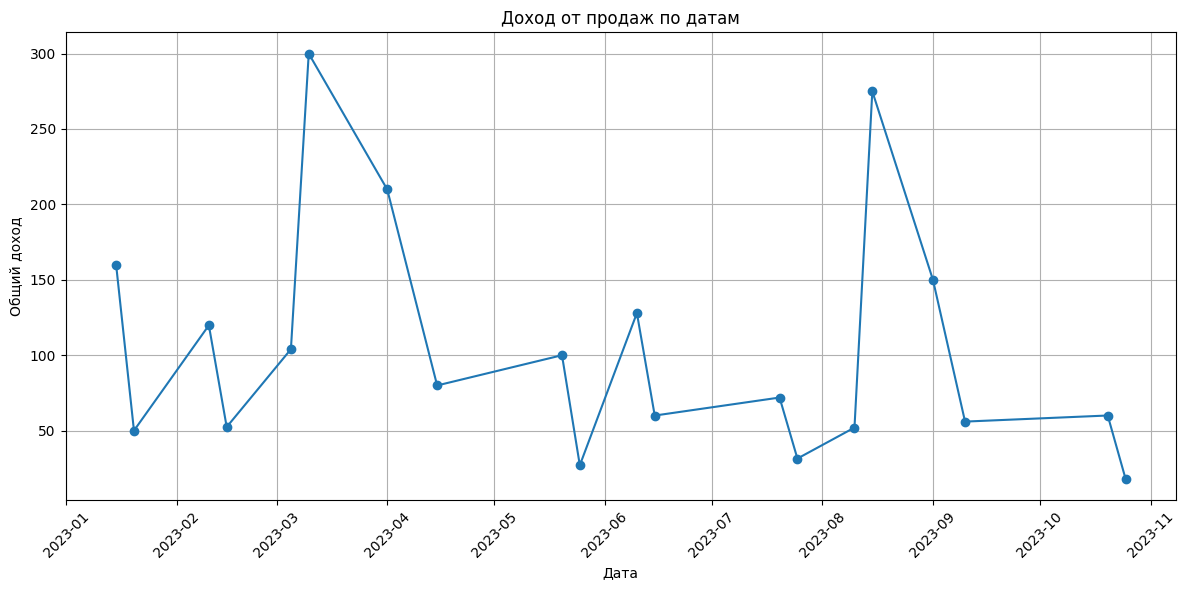

In [2]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt

# Подключение к базе данных
conn = psycopg2.connect(
    dbname="sale_db",
    user="postgres",
    password="1234",
    host="127.0.0.1"
)

# SQL-запрос для извлечения данных о доходах от продаж
query = """
SELECT 
    s.sale_date,
    SUM(s.quantity * p.price) AS total_income
FROM sales s
JOIN products p ON s.product_id = p.id
GROUP BY s.sale_date
ORDER BY s.sale_date;
"""

# Извлечение данных в DataFrame
df = pd.read_sql_query(query, conn)

# Закрытие соединения
conn.close()

# Преобразование столбца 'sale_date' в формат даты
df['sale_date'] = pd.to_datetime(df['sale_date'])

# Построение графика
plt.figure(figsize=(12, 6))
plt.plot(df['sale_date'], df['total_income'], marker='o', linestyle='-')
plt.title('Доход от продаж по датам')
plt.xlabel('Дата')
plt.ylabel('Общий доход')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()